In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

%matplotlib inline

In [3]:
dataset = pd.read_csv('../train-missings.csv')

In [4]:
dataset.head()

,Id,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,target
0,1,2596.0,NaN,3.0,NaN,0.0,NaN,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,5
1,2,2590.0,56.0,2.0,212.0,NaN,390.0,220.0,NaN,NaN,6225.0,1.0,0.0,0.0,5
2,3,2804.0,NaN,9.0,268.0,65.0,3180.0,NaN,238.0,NaN,6121.0,NaN,0.0,0.0,2
3,4,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,NaN,0.0,2
4,5,2595.0,45.0,NaN,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,5


In [29]:
dataset.shape

(15120, 15)

In [22]:
[(c, np.size(dataset[c].unique())) for c in dataset.columns]

[('Id', 15120),
 ('p1', 1634),
 ('p2', 362),
 ('p3', 53),
 ('p4', 380),
 ('p5', 408),
 ('p6', 2986),
 ('p7', 172),
 ('p8', 137),
 ('p9', 247),
 ('p10', 2526),
 ('p11', 3),
 ('p12', 3),
 ('p13', 3),
 ('target', 7)]

##### Drop "Id" column because our dataset has 15120 rows and the "Id" column also has 15120 unique value 

In [35]:
dataset = dataset.drop(columns='Id')

In [36]:
dataset.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,target
0,2596.0,NaN,3.0,NaN,0.0,NaN,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,NaN,390.0,220.0,NaN,NaN,6225.0,1.0,0.0,0.0,5
2,2804.0,NaN,9.0,268.0,65.0,3180.0,NaN,238.0,NaN,6121.0,NaN,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,NaN,0.0,2
4,2595.0,45.0,NaN,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,5


In [41]:
[(c, dataset[c].isnull().sum() / dataset.shape[0]) for c in dataset.columns]

[('p1', 0.19603174603174603),
 ('p2', 0.1939153439153439),
 ('p3', 0.2),
 ('p4', 0.20165343915343914),
 ('p5', 0.20085978835978835),
 ('p6', 0.20257936507936508),
 ('p7', 0.19636243386243385),
 ('p8', 0.20403439153439154),
 ('p9', 0.20152116402116402),
 ('p10', 0.1962962962962963),
 ('p11', 0.20429894179894179),
 ('p12', 0.20429894179894179),
 ('p13', 0.19325396825396826),
 ('target', 0.0)]

In [312]:
clean_dataset = dataset.fillna(dataset.mean())

In [313]:
train, test = train_test_split(clean_dataset, test_size = 0.2, random_state = 42)

In [314]:
train, validation  = train_test_split(train, test_size = test.shape[0]/train.shape[0], random_state = 42)

In [130]:
print(train.shape)
print(validation.shape)
print(test.shape)

(9072, 14)
(3024, 14)
(3024, 14)


##### Our dataset is completely balanced so doesn't need any operation for that

In [243]:
clean_dataset.groupby('target').target.count()

target
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: target, dtype: int64

##### Visualize data

In [281]:
data = PCA(n_components=2).fit_transform(clean_dataset.values[:,:-1])

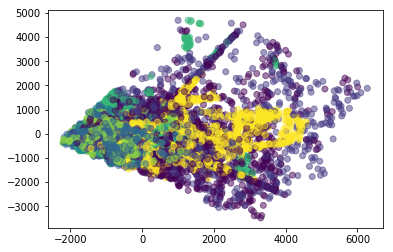

In [282]:
plt.scatter(data[:,0], data[:,1], c=clean_dataset.target, cmap = 'viridis', alpha= 0.5)

##### Test data for if it has some embedings

In [284]:
data = Isomap(n_components=2).fit_transform(train.values[:,:-1])

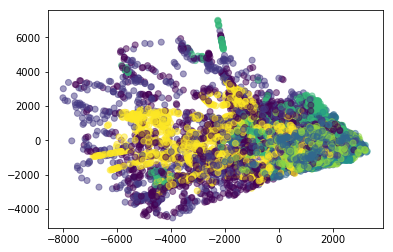

In [285]:
plt.scatter(data[:,0], data[:,1], c=clean_dataset.target, cmap = 'viridis', alpha= 0.5)

In [379]:
data = PCA().fit(train.values[:,:-1])

In [380]:
np.round(data.explained_variance_ratio_, 3)

array([0.671, 0.271, 0.041, 0.012, 0.004, 0.001, 0.001, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   ])

In [393]:
pca_model = PCA(n_components=7).fit(train.values[:,:-1])
x_train = pca_model.transform(train.values[:,:-1])
x_validation = pca_model.transform(validation.values[:,:-1])

In [394]:
model = LogisticRegression()

In [395]:
model.fit(x_train[:,:-1], train.values[:,-1])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [396]:
print(model.score(x_train[:,:-1], train.values[:,-1]))
print(model.score(x_validation[:,:-1], validation.values[:,-1]))

0.45105820105820105
0.4599867724867725


In [397]:
model2 = RandomForestClassifier(n_estimators=100, max_depth=20)

In [398]:
model2.fit(x_train[:,:-1], train.values[:,-1])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [399]:
print(model2.score(x_train[:,:-1], train.values[:,-1]))
print(model2.score(x_validation[:,:-1], validation.values[:,-1]))

0.9995590828924162
0.6683201058201058
